# Weighted Automata

We want to model weighted automata, i.e., automata weighted in the min-plus-semiring `(N\cup{\infty},min,+,\infty,0)`.

In [1]:
from IPython.display import display
import spot
import buddy
spot.setup()

This code is taken from tut23:

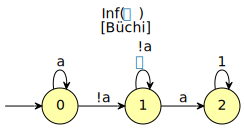

In [2]:
bdict = spot.make_bdd_dict();
aut = spot.make_twa_graph(bdict)
a = buddy.bdd_ithvar(aut.register_ap("a"))
b = buddy.bdd_ithvar(aut.register_ap("b"))
aut.set_acceptance(1, "Inf(0)")
aut.new_states(3)
aut.set_init_state(0);

aut.new_edge(0, 0, a); # edge 1
aut.new_edge(0, 1, -a); # edge 2
aut.new_edge(1, 1, -a, [0]); #edge 3
aut.new_edge(1, 2, a); #edge 4
aut.new_edge(2, 2, buddy.bddtrue); #edge 5

aut

Now, we add weights:

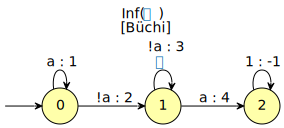

In [14]:
spot.set_weight(aut, 1, 1)
spot.set_weight(aut, 2, 2)
spot.set_weight(aut, 3, 3)
spot.set_weight(aut, 4, 4)
spot.set_weight(aut, 5,-1) # -1 stands for infinity

aut

As seen above, weights are output in dot format and therefore displayed in the picture above following a colon.

In [16]:
print(aut.to_str('dot'))

digraph "" {
  rankdir=LR
  label=<Inf(<font color="#1F78B4">⓿</font>)<br/>[Büchi]>
  labelloc="t"
  node [shape="circle"]
  node [style="filled", fillcolor="#ffffaa"]
  fontname="Lato"
  node [fontname="Lato"]
  edge [fontname="Lato"]
  size="10.13,5" edge[arrowhead=vee, arrowsize=.7]
  I [label="", style=invis, width=0]
  I -> 0
  0 [label=<0>]
  0 -> 0 [label=<a : 1>]
  0 -> 1 [label=<!a : 2>]
  1 [label=<1>]
  1 -> 1 [label=<!a : 3<br/><font color="#1F78B4">⓿</font>>]
  1 -> 2 [label=<a : 4>]
  2 [label=<2>]
  2 -> 2 [label=<1 : -1>]
}



In hoa, the weights are added in <>-brackets behind the edges:

In [17]:
print(aut.to_str('hoa'))

HOA: v1
States: 3
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc complete
properties: deterministic
--BODY--
State: 0
[0] 0 <1>
[!0] 1 <2>
State: 1
[!0] 1 <3> {0}
[0] 2 <4>
State: 2
[t] 2 <-1>
--END--


We save that automaton to a file.

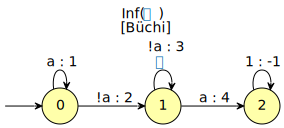

In [18]:
aut.save('example.hoa')

In [19]:
!cat example.hoa

HOA: v1
States: 3
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc complete
properties: deterministic
--BODY--
State: 0
[0] 0 <1>
[!0] 1 <2>
State: 1
[!0] 1 <3> {0}
[0] 2 <4>
State: 2
[t] 2 <-1>
--END--


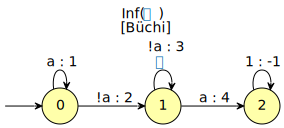

In [20]:
for a in spot.automata('example.hoa'):
    display(a)

The hoa-format also allows multiple edges per row in an short description (see the four edges starting in state 0):

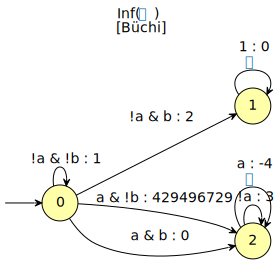

In [21]:
for a in spot.automata("""
HOA: v1
name: "F(b | GFa)"
States: 3
Start: 0
AP: 2 "b" "a"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels complete stutter-invariant
--BODY--
State: 0
0 <1> 1 <2> 2 <429496729> 2
State: 1 {0}
[t] 1
State: 2
[!1] 2 <+3>
[1] 2 <-4> {0}
--END--
"""):
    display(a)

Note that many algorithms release named properties and therefore delete weights.

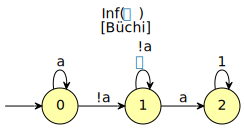

In [22]:
aut.release_named_properties()
aut

In [23]:
!rm example.hoa